In [2]:
import os 

In [1]:
import pandas as pd

data = pd.read_csv('advertising.csv')

data
#Here we are exploring the data 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
#The data consists of the expenses of advertising on TV ,Newspapers and Radios. As well as the sales which occured after these expeditures.

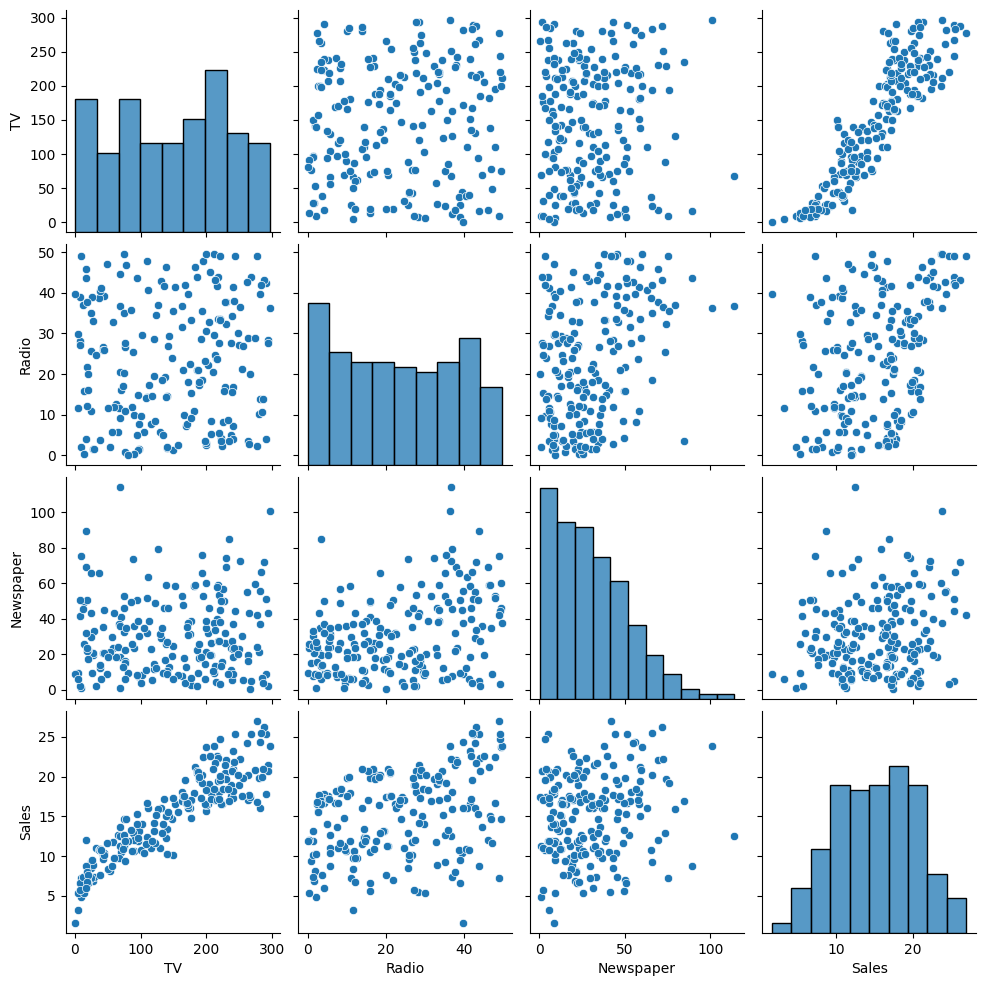

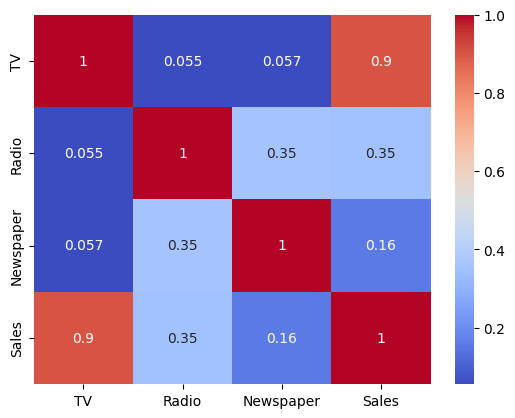

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#Here we pass the data given by the .describe() function to visualize it for easier understandting of the
#general trends.
data.describe()


sns.pairplot(data)
plt.show()


correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
#We notice that the sales are much higher on the TV compared to radion and newspapers. Radios also perform better than news papers.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Since I used Random forest in the previous task  I will use LinearRegression

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2.9077569102710896, 0.9059011844150826)

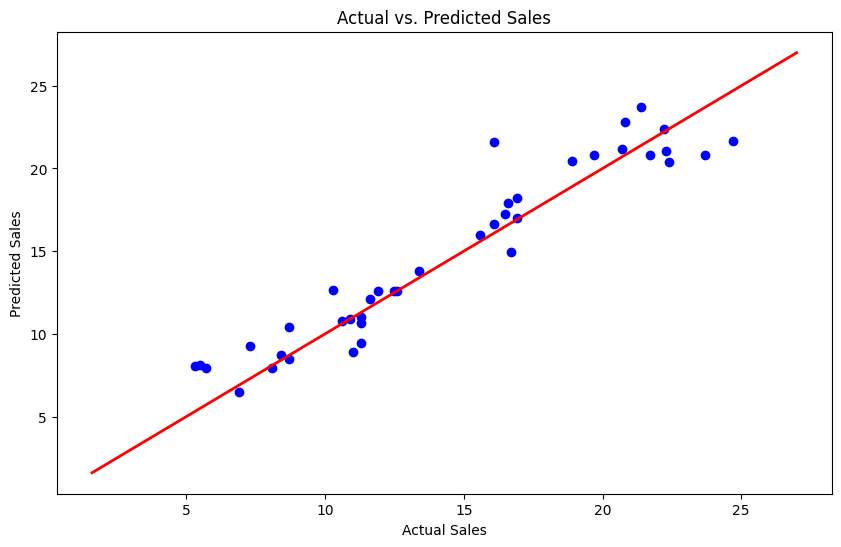

In [6]:
# Visualize actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()



In [16]:
#The predictions arent as accurate as they should be so we will attempt to engineer the input data

In [7]:
from sklearn.preprocessing import StandardScaler
data = data.loc[data.index.drop_duplicates()]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper','Sales']])
scaled_features_df = pd.DataFrame(scaled_features, columns=['TV', 'Radio', 'Newspaper','Sales'])
data = scaled_features_df.copy()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Since I used Random forest in the previous task  I will use LinearRegression

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.10467117747059336, 0.9059011844150826)

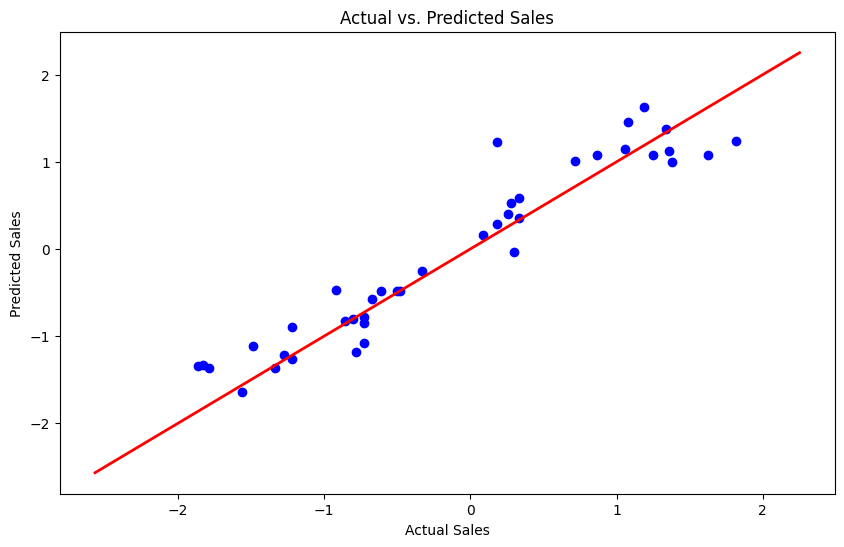

In [19]:
# Visualize actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()



In [ ]:
#While the mean error improved the r2 score did not , this is a consequence of the dataset's nature.